# Austin Crime Analysis

The aim of this data analysis is to explore the crime patterns in the City of Austin to gain insights on the crime areas that should have more investment on public security. This analysis used data from 2016 to 2017. Data was obtained from the [City of Austin](ftp://ftp.ci.austin.tx.us/CrimeMapData/) website. 

- What are the top 10 most common crimes during this period of time?
- What are the crime types that have a median above 25 crimes/day?
- For each of the crime type identified previously, what does its spread look like on a KDE plot? Where are the crimes located on Google Maps?

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data

In [2]:
# Load the cleaned data file from disk
import pandas as pd
crime_df = pd.read_csv('austin_crime_clean.csv', encoding = "cp1252")

In [3]:
# Check the size of the dataset
crime_df.shape

(42813, 7)

# Exploring the data

In [4]:
crime_df.head()

,IncidentReportNumber,CrimeType,Date,Time,Address,Longitude,Latitude
0,20175014269,BURGLARY OF VEHICLE,2017-04-06,1900,6934 E BEN WHITE BLVD SVRD WB,-97.703550,30.215663
1,2017970280,CHECK WELFARE,2017-04-07,441,6808 S IH 35 SVRD SB,-97.772963,30.187946
2,20175014277,CRASH/LEAVING THE SCENE,2017-04-06,1330,9414 PARKFIELD DR,-97.706266,30.367904
3,2017961396,ASSAULT WITH INJURY,2017-04-03,2200,5305 KING HENRY DR,-97.660276,30.288873
4,2017970325,BURGLARY NON RESIDENCE,2017-04-06,2030,2005 WHELESS LN,-97.687720,30.313561


In [5]:
crime_df.columns

Index(['IncidentReportNumber', 'CrimeType', 'Date', 'Time', 'Address',
       'Longitude', 'Latitude'],
      dtype='object')

# What are the top 10 crime in Austin?

In [6]:
#  Aggregate Austin crimes by CrimeType
gr_by_crimetype = crime_df[['CrimeType', 'Time']].groupby('CrimeType').agg('count')    # the time column is a place holder for the aggregated count 
gr_by_crimetype.reset_index(inplace=True)                                                                    # flattens the multi-levels in the df    
gr_by_crimetype.columns = ['CrimeType', 'Incident']  

# Sort the crime type by highest incidents and display the computed percentages
gr_by_crimetype.sort_values(by='Incident', ascending=False, inplace=True)
gr_by_crimetype['Percent'] = gr_by_crimetype.Incident.apply( lambda x: '{:.2f}'.format(float(x)/crime_df.shape[0]*100))

In [7]:
top_10_crimes = gr_by_crimetype[0:10]
top_10_crimes

,CrimeType,Incident,Percent
181,FAMILY DISTURBANCE,2642,6.17
89,CRASH/LEAVING THE SCENE,2491,5.82
358,THEFT,2341,5.47
72,BURGLARY OF VEHICLE,2326,5.43
101,CRIMINAL TRESPASS NOTICE,2239,5.23
160,EMERGENCY DETENTION,1338,3.13
96,CRIMINAL MISCHIEF,1257,2.94
156,EDP INTERVENTION WITH CONTACT,1072,2.50
47,ASSAULT W/INJURY-FAM/DATE VIOL,901,2.10
130,DISTURBANCE - OTHER,845,1.97


We can see from the top 10 crimes listed above, crashing and leaving takes top stop, followed by family disturbance, theft and burglary of vehicle. 

# From the top 10 crimes, what types of crime have a median of 25 crimes per day or more?

The first thing we need to do is aggregate each of the top 10 crimes by crime type and day:

In [8]:
# Group reported incidents (rows) by crime type and day
gr_by_day = crime_df[['CrimeType', 'Date', 'Address']].groupby(['CrimeType', 'Date']).agg('count')    
gr_by_day.reset_index(inplace=True)        
gr_by_day.columns = ['CrimeType', 'Date', 'Quantity']

# Filter for the top 10 crimes
gr_by_day = gr_by_day[gr_by_day.CrimeType.isin(top_10_crimes['CrimeType'].values)]
gr_by_day.head()

,CrimeType,Date,Quantity
1542,ASSAULT W/INJURY-FAM/DATE VIOL,2017-02-20,1
1543,ASSAULT W/INJURY-FAM/DATE VIOL,2017-03-01,1
1544,ASSAULT W/INJURY-FAM/DATE VIOL,2017-03-17,1
1545,ASSAULT W/INJURY-FAM/DATE VIOL,2017-03-31,3
1546,ASSAULT W/INJURY-FAM/DATE VIOL,2017-04-01,11


Now we're ready to identify those crime types with a median of 25 crimes or more per day. We will a boxplot to discover the median of the crimes graphically:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

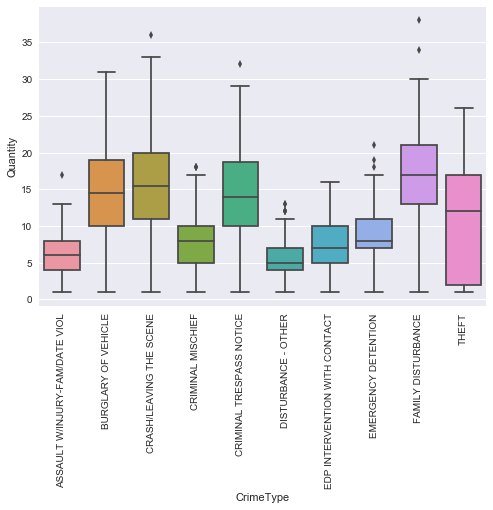

In [9]:
sns.set(style='darkgrid')
g = sns.boxplot(data=gr_by_day, x='CrimeType', y='Quantity')
plt.xticks(rotation=90)

The boxplot clearly shows the type of crimes with at least 25 crimes per day.  They are crash/leaving the scene, family disturbance, burglary of vehicle and theft.

# For each of the crimes identified, what does its spread look like?

We will use a KDE plot to analyze the spread of each crime. Later on, we will compute its mean coordinates to mark the central crime location on Google Maps.

> NOTE: Taking the mean of the values is not the best way to calculate the centrality of the data points. Clustering techniques would be much more suitable for this task but we're not going to apply clustering in this case study. Given the technique used in this exploratory analysis, computing the mean of the coordinates is the best we can do to get the central coordinates of each crime type.

To create  KDE plots, it will be easier to work with dataframes with only the latitude and longitude data for each crime type. Let's begin by creating the new dataframes:

In [10]:
crash_leavingscene = crime_df[['Latitude','Longitude']] [crime_df['CrimeType'] == 'CRASH/LEAVING THE SCENE']
family_disturbance = crime_df[['Latitude','Longitude']] [crime_df['CrimeType'] == 'FAMILY DISTURBANCE']
burglary_vehicle = crime_df[['Latitude','Longitude']] [crime_df['CrimeType'] == 'BURGLARY OF VEHICLE']
theft = crime_df[['Latitude','Longitude']] [crime_df['CrimeType'] == 'THEFT']

**Finding the spread of each crime type:**

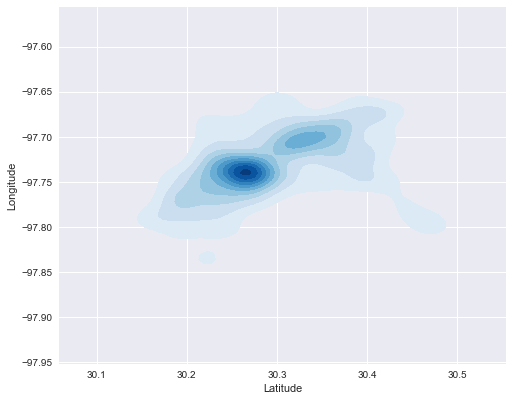

In [11]:
# Crash/Leaving the Scene 
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(crash_leavingscene.Latitude, crash_leavingscene.Longitude, cmap="Blues", shade=True, shade_lowest=False)
plt.show()

The KDE plot for Crash/Leaving the Scene shows a pattern of a central area with its spread (dispersion) in the lighter shades.

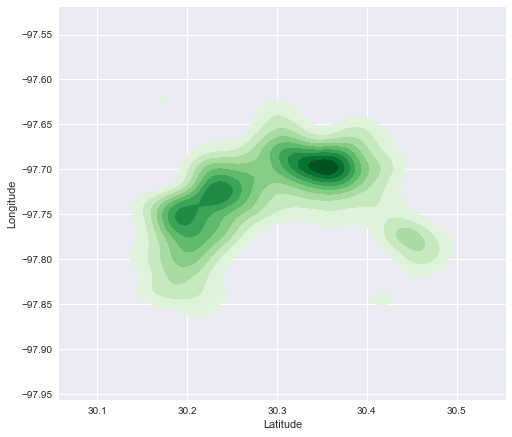

In [12]:
# Family Disturbance 
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(family_disturbance.Latitude, family_disturbance.Longitude, cmap="Greens", shade=True, shade_lowest=False)
plt.show()

The KDE plot for Family Disturbance shows a different pattern of dispersion than Crash/Leaving the Scene. It has two central tendencies with a wider spread than Crash/Leaving the Scene.

> Note: Notice two of the centers are much closer together. In this case, KDE is not the best way to discover the centers for this crime variable. It would be better to use clustering to anlayze the central tendencies -- we would likely get two central area rather than three. As mentioned previously, clustering is a more advance technique which we won't worry about it here. It also requires the installation of additional packages to create the plot.

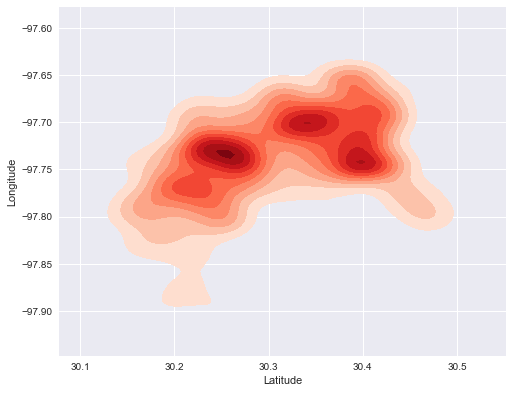

In [13]:
# Burglary of Vehicle 
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(burglary_vehicle.Latitude, burglary_vehicle.Longitude, cmap="Reds", shade=True, shade_lowest=False)
plt.show()

The KDE plot for Burglary of Vehicle shows a pattern of one central tendency with a wider spread than Family Disturbance. 

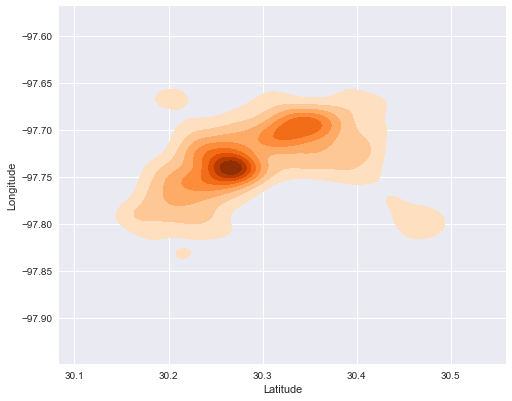

In [14]:
# Thef 
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(theft.Latitude, theft.Longitude, cmap="Oranges", shade=True, shade_lowest=False)
plt.show()

The KDE plot for Thef show a pattern similar to Crash/Leaving the Scene and definitely not as wide of a spread as Burglary of Vehicle.

Next, let's compute the mean coordinates for each crime type so we can use them to locate the general surrounding area on Google Maps.

**Finding the central location of each crime:**

In [15]:
# Compute the mean of the coordinates
crash_leavingscene_center_lat = crash_leavingscene.Latitude.mean()
crash_leavingscene_center_long = crash_leavingscene.Longitude.mean()

family_disturbance_center_lat = family_disturbance.Latitude.mean()
family_disturbance_center_long = family_disturbance.Longitude.mean()

burglary_vehicle_center_lat = burglary_vehicle.Latitude.mean()
burglary_vehicle_center_long = burglary_vehicle.Longitude.mean()

theft_center_lat = theft.Latitude.mean()
theft_center_long = theft.Longitude.mean()

# Print the central coordinates (latitude, longitude)
print('CRASH/LEAVING THE SCENE coordinates: ({:f},{:f})'.format(crash_leavingscene_center_lat, crash_leavingscene_center_long))
print('FAMILY DISTURBANCE coordinates: ({:f},{:f})'.format(family_disturbance_center_lat, family_disturbance_center_long))
print('BURGLARY OF VEHICLE coordinates: ({:f},{:f})'.format(burglary_vehicle_center_lat, burglary_vehicle_center_long))
print('THEFT coordinates: ({:f},{:f})'.format(theft_center_lat, theft_center_long))

CRASH/LEAVING THE SCENE coordinates: (30.294839,-97.736724)
FAMILY DISTURBANCE coordinates: (30.290363,-97.735076)
BURGLARY OF VEHICLE coordinates: (30.307406,-97.737854)
THEFT coordinates: (30.296209,-97.737531)


# Where are the crimes on Google Maps?
Let's investigate whether the top crimes are close to each other by plotting their mean lattitude and longitude coordinates on Google Maps:

Top Austin Crimes: Crash/Leaving the Scene, Family Disturbance, Burglary of Vehicle, and Theft


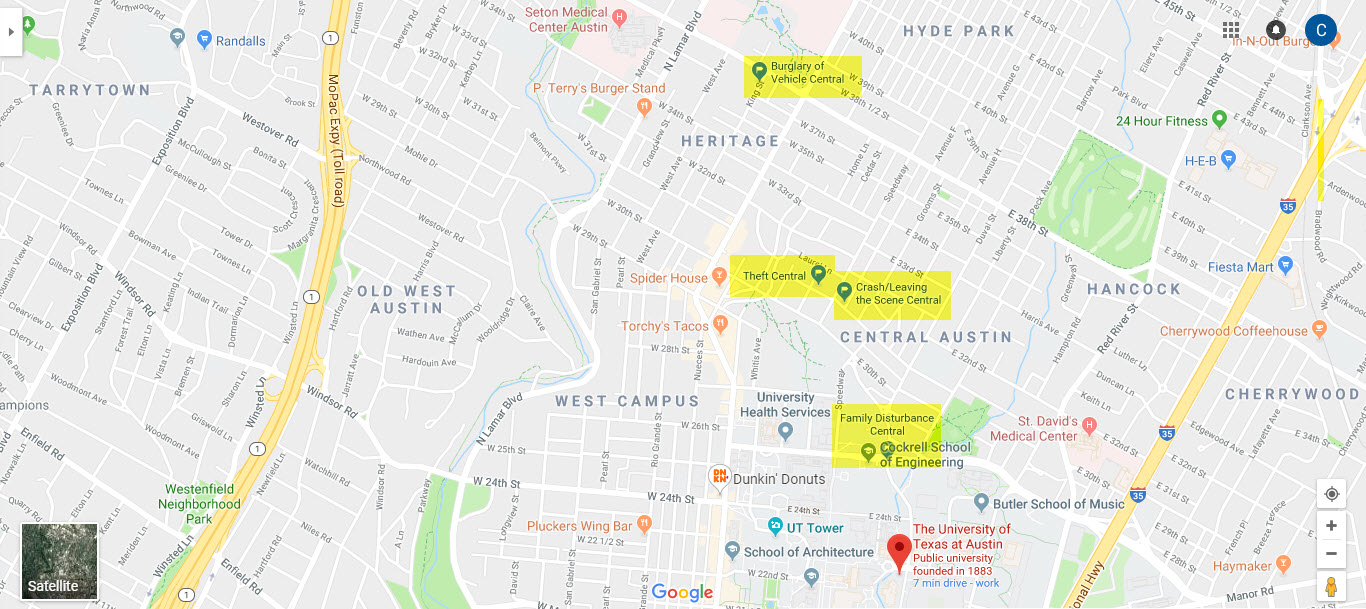

In [16]:
from IPython.core.display import Image, display
print("Top Austin Crimes: Crash/Leaving the Scene, Family Disturbance, Burglary of Vehicle, and Theft")
display(Image(filename= 'images\\top-four-crime-centrals.jpg'))


# Conclusion

Based on the 2017 crime data, the top crimes in Austin are crash/leaving the scene, family disturbance, burglary of vehicle, and theft. The central locations of these crimes are right in central Austin with the exeption of Burglary of Vehicle in the Heritage neighborhood. All four of these crimes had 25 or more reported incidents per day in 2017. These areas of town are not the best place to be in terms of public safety. 